# Image Classification using `Supervised Learning`

In [ ]:
!pip install scikit-image

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import Bunch

%matplotlib inline
from skimage.io import imread
from skimage.transform import resize

### Load images in structured directory like it's sklearn sample dataset

In [7]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder with different Shape and i am converting into 64.64
    
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to 
    the main folder holding one subfolder per category[Sunflower, Pizza,Dollars]
    
    dimension : tuple
        size to which image are adjusted to 64 * 64
    Returns
    -------
    Bunch images to array 
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    
    descr = """A image classification dataset We are Converting the Data in Equal Dimension like 64*64
    Number of images are in SubFolders is = 195
    Names of Images with Differernt type = ['sunflower','pizza','dollar_bill']
    
    The Data Is in Different Dimension we Have to Convert into the 64*64 images
    """
    images = []
    flat_data = []
    target = []
    
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            #plt.imshow(img)  # Original Images we have to Converting Image 
            #plt.show()
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)  # After Converting The Image
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

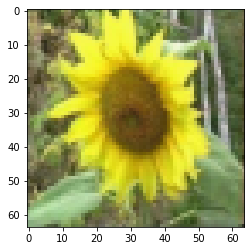

In [8]:
import skimage
image_dataset = load_image_files("Data/images/")

In [9]:
print(image_dataset.DESCR)

A image classification dataset We are Converting the Data in Equal Dimension like 64*64
    Number of images are in SubFolders is = 195
    Names of Images with Differernt type = ['sunflower','pizza','dollar_bill']
    
    The Data Is in Different Dimension we Have to Convert into the 64*64 images
    


In [ ]:
image_dataset.data[0:5]

In [ ]:
image_dataset.images[0].shape

In [ ]:
image_dataset.target

In [ ]:
image_dataset.target_names

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target,test_size= 0.5,random_state=109)

In [ ]:
X_train.shape

In [ ]:
X_train[0:5]

In [ ]:
y_test.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.svm import SVC
Svc = SVC(gamma='auto')

In [ ]:
Svc.fit(X_train,y_train)

In [ ]:
Svc.score(X_train,y_train)

In [ ]:
Svc.score(X_test,y_test)

In [ ]:
New_predict =Svc.predict(X_test)
New_predict[0:5]

In [ ]:
y_test[0:5]

In [ ]:
pd.DataFrame({'Actual_Data':y_test,
             'New_predict':New_predict})

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
cm = confusion_matrix(New_predict,y_test)

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(New_predict,y_test))

### Train data with parameter optimitrain_test_splitn

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01], 'kernel': ['rbf','poly','sigmoid']}
 ]
svc = svm.SVC()
svc 

Grid Search is the Process of Performaing `Hyper parameter tuning` in order to determain the optimal values for given model

In [ ]:
clf = GridSearchCV(svc, param_grid)
clf

In [ ]:
clf.fit(X_train, y_train)

### Predict

In [ ]:
y_pred = clf.predict(X_test)
y_pred

In [ ]:
y_test

### Report

In [ ]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv = cross_val_score(clf,X_train,y_train,cv=10)

In [ ]:
np.min(cv)

In [ ]:
np.max(cv)

In [ ]:
np.mean(cv)

In [ ]:
clf.predict(image_dataset.data[[190]])